In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [0]:
df=spark.read.csv('/mnt/projects/salary_dataset.csv',header=True)

In [0]:
df_spark= df.withColumnRenamed('---','Companies')\
    .withColumnRenamed('Job Title', 'Job_Title')\
    .withColumnRenamed('Salaries Reported', 'Salaries_Reported')


In [0]:
empty_values_df=df_spark.filter(col("Companies").isNull() | col("Job_Title").isNull() | col("Salaries_Reported").isNull() | col("Location").isNull() | col("Salary").isNull())
empty_values_df.display()

Companies Job_Title Salaries_Reported Location Salary Vedantu Data Analyst null Pune ₹4,53,300/yr XYZ Machine Learning Data Associate II null New Delhi ₹3,29,439/yr null Machine Learning Developer 1 Mumbai ₹4,10,952/yr null Software Engineer - Machine Learning 1 Mumbai ₹16,12,324/yr null Machine Learning Engineer 1 Mumbai ₹9,39,843/yr

In [0]:
result = df_spark.groupBy("Companies", "Job_Title", "Salaries_Reported", "Location", "Salary") \
            .agg(count("*").alias("count")) \
            .filter("count > 1")
display(result)

Companies Job_Title Salaries_Reported Location Salary count Tata Consultancy Services Data Engineer 1 Mumbai ₹20,14,668/yr 2 UnitedHealth Group Machine Learning Engineer 1 Pune ₹12,00,000/yr 2 Ericsson-Worldwide Data Science 1 Pune ₹15,000/mo 2 Wipro Machine Learning Engineer 1 New Delhi ₹8,28,777/yr 2 HSBC Data Scientist 1 Mumbai ₹10,00,000/yr 2 Tata Consultancy Services Data Engineer 1 Mumbai ₹12,32,857/yr 2 ZS Associates Machine Learning Engineer 1 Mumbai ₹10,749/mo 2

In [0]:
df_spark_new=df_spark.dropDuplicates()

In [0]:
df_spark_new.count()

Out[433]: 4337

In [0]:
df_spark_new.select("Job_Title").distinct().display()

Job_Title Machine Learning Data Associate Machine Learning Software Engineer Associate Machine Learning Engineer Machine Learning Consultant Machine Learning Scientist Machine Learning Data Associate II Senior Machine Learning Engineer Software Engineer - Machine Learning Machine Learning Engineer Data Science Lead Lead Data Scientist Data Scientist - Trainee Machine Learning Developer Data Scientist Data Analyst Machine Learning Data Associate I Data Science Consultant Machine Learning Data Analyst Machine Learning Associate Data Science Manager Senior Data Scientist Junior Data Scientist Data Science Associate Data Science Machine Learning Engineer/Data Scientist Data Engineer

In [0]:
df1 = df_spark_new.withColumn('Job_Category', when(df_spark_new.Job_Title == 'Data Science', 'Data Scientist') \
                                    .when(df_spark_new.Job_Title == 'Data Science Lead', 'Lead Data Scientist') \
                                    .when(df_spark_new.Job_Title == 'Machine Learning Engineer/Data Scientist', 'Data Scientist') \
                                    .otherwise(df_spark_new.Job_Title))

display(df1)                                  

Companies Job_Title Salaries_Reported Location Salary Job_Category Accenture Data Scientist 4 Bangalore ₹9,87,471/yr Data Scientist ADP Data Scientist 3 Bangalore ₹28,73,437/yr Data Scientist Bajaj Finserv Health Data Scientist 1 Bangalore ₹10,70,536/yr Data Scientist Coviam Data Scientist 1 Bangalore ₹5,02,448/yr Data Scientist Deloitte Data Scientist 1 Pune ₹30,147/mo Data Scientist Eagle TK Infotech Data Scientist 1 Pune ₹5,14,600/yr Data Scientist Edelweiss Tokio Life Insurance Data Scientist 1 Pune ₹1,07,054/mo Data Scientist Eko India Financial Services Data Scientist 1 Pune ₹1,00,326/mo Data Scientist Ericsson-Worldwide Data Science 1 Pune ₹15,000/mo Data Scientist First Student Data Scientist 4 Hyderabad ₹20,20,386/yr Data Scientist FlexTrade Systems Inc. Data Scientist 2 Hyderabad ₹14,92,543/yr Data Scientist GS Lab Data Scientist 1 New Delhi ₹1,04,913/mo Data Scientist HCL Technologies Data Scientist 10 Mumbai ₹9,00,000/yr Data Scientist Himani Data Scientist 2 Mumbai ₹41,940/mo Data Scientist Innoplexus Data Analyst 3 Bangalore ₹15,073/mo Data Analyst Kantar Data Analyst 2 Pune ₹4,68,499/yr Data Analyst Knowledge Lens Data Analyst 1 Pune ₹4,06,551/yr Data Analyst KoiReader Technologies Data Analyst 1 Pune AFN 1,56,179/yr Data Analyst Nhai Data Analyst 7 Mumbai ₹4,96,022/yr Data Analyst Persistent Systems Senior Data Engineer 3 Bangalore ₹7,50,000/yr Data Engineer Signify Data Engineer 3 New Delhi ₹6,90,356/yr Data Engineer ThinkBumblebee Analytics Machine Learning Engineer 1 Bangalore ₹10,07,334/yr Machine Learning Engineer Yodlee Machine Learning Engineer 1 Mumbai ₹1,00,000/mo Machine Learning Engineer Absolutdata Data Scientist 6 Bangalore ₹9,69,112/yr Data Scientist Amazon Data Scientist 2 Bangalore ₹5,49,688/yr Data Scientist Analytics Vidhya Data Scientist 1 Bangalore ₹10,03,261/yr Data Scientist Analytics Vidhya Data Scientist 1 Bangalore ₹9,20,903/yr Data Scientist ANZ Bank Data Scientist 1 Bangalore ₹6,83,496/yr Data Scientist Apsidata solutions Data Scientist 1 Bangalore ₹1,22,137/mo Data Scientist Batlivala & Karani Securities Data Scientist 1 Bangalore ₹35,00,000/yr Data Scientist Cognizant Technology Solutions Data Scientist 1 Bangalore ₹12,84,643/yr Data Scientist Datamatics Global Services Data Scientist 17 Pune ₹11,63,186/yr Data Scientist Datamatics Global Services Data Scientist 11 Pune ₹10,36,536/yr Data Scientist DXC Technology Data Scientist 1 Pune ₹12,16,773/yr Data Scientist EMPLOYERS Data Scientist 1 Pune ₹9,48,931/yr Data Scientist HARMAN Data Scientist 1 New Delhi ₹16,375/mo Data Scientist ICICI Bank Data Scientist 1 Mumbai ₹6,09,826/yr Data Scientist J.P. Morgan Data Analyst 10 Pune ₹7,12,615/yr Data Analyst Kritha Convertors Data Analyst 1 Pune ₹31,079/mo Data Analyst LTI Data Analyst 3 Hyderabad ₹6,69,115/yr Data Analyst OLX Group Data Analyst 1 Mumbai ₹8,76,909/yr Data Analyst Predictive Research Data Engineer 2 Bangalore ₹11,62,739/yr Data Engineer Rahul Industries Data Engineer 1 Pune ₹6,67,797/yr Data Engineer Shaw Academy Data Engineer 1 Hyderabad ₹21,628/mo Data Engineer Sravathi Advance Process Technologies Data Engineer 1 New Delhi ₹1,50,733/mo Data Engineer Tata AIG General Insurance Data Engineer 1 Mumbai ₹2,34,362/yr Data Engineer TeamLease Staffing Solutions Machine Learning Engineer 2 Bangalore ₹7,83,333/yr Machine Learning Engineer Tracxn Machine Learning Engineer 1 Bangalore ₹3,02,693/yr Machine Learning Engineer UnitedHealth Group Machine Learning Engineer 1 Pune ₹7,30,000/yr Machine Learning Engineer Vasta Global Machine Learning Software Engineer 1 Pune ₹13,97,347/yr Machine Learning Software Engineer ZS Associates Machine Learning Engineer 1 Mumbai ₹11,293/mo Machine Learning Engineer Abzooba Data Scientist 6 Bangalore ₹12,91,549/yr Data Scientist Adobe Data Scientist 3 Bangalore ₹38,12,913/yr Data Scientist Amazon Data Scientist 2 Bangalore ₹6,38,755/yr Data Scientist App Orchid Data Scientist 1 Bangalore ₹1,40,685/mo Data Scientist Capgemini Data Scientist 1 Bangalore

In [0]:
from pyspark.sql.types import IntegerType,DecimalType
# df1 = df1.withColumn("Salary_in_int", df1["Salary"].cast(IntegerType()))

df2 = df1.withColumn("Currency", regexp_extract(df1.Salary, "^[^\d]+", 0)) \
         .withColumn('Amount', regexp_extract(df1.Salary, '(\d[\d,]*)', 1)) \
         .withColumn('Amount', regexp_replace('Amount', ',', '').cast(DecimalType(20,2))) \
         .withColumn('Period', regexp_extract(df1.Salary, '(\w+)$', 1))

display(df2)

Companies Job_Title Salaries_Reported Location Salary Job_Category Currency Amount Period Accenture Data Scientist 4 Bangalore ₹9,87,471/yr Data Scientist ₹ 987471.00 yr ADP Data Scientist 3 Bangalore ₹28,73,437/yr Data Scientist ₹ 2873437.00 yr Bajaj Finserv Health Data Scientist 1 Bangalore ₹10,70,536/yr Data Scientist ₹ 1070536.00 yr Coviam Data Scientist 1 Bangalore ₹5,02,448/yr Data Scientist ₹ 502448.00 yr Deloitte Data Scientist 1 Pune ₹30,147/mo Data Scientist ₹ 30147.00 mo Eagle TK Infotech Data Scientist 1 Pune ₹5,14,600/yr Data Scientist ₹ 514600.00 yr Edelweiss Tokio Life Insurance Data Scientist 1 Pune ₹1,07,054/mo Data Scientist ₹ 107054.00 mo Eko India Financial Services Data Scientist 1 Pune ₹1,00,326/mo Data Scientist ₹ 100326.00 mo Ericsson-Worldwide Data Science 1 Pune ₹15,000/mo Data Scientist ₹ 15000.00 mo First Student Data Scientist 4 Hyderabad ₹20,20,386/yr Data Scientist ₹ 2020386.00 yr FlexTrade Systems Inc. Data Scientist 2 Hyderabad ₹14,92,543/yr Data Scientist ₹ 1492543.00 yr GS Lab Data Scientist 1 New Delhi ₹1,04,913/mo Data Scientist ₹ 104913.00 mo HCL Technologies Data Scientist 10 Mumbai ₹9,00,000/yr Data Scientist ₹ 900000.00 yr Himani Data Scientist 2 Mumbai ₹41,940/mo Data Scientist ₹ 41940.00 mo Innoplexus Data Analyst 3 Bangalore ₹15,073/mo Data Analyst ₹ 15073.00 mo Kantar Data Analyst 2 Pune ₹4,68,499/yr Data Analyst ₹ 468499.00 yr Knowledge Lens Data Analyst 1 Pune ₹4,06,551/yr Data Analyst ₹ 406551.00 yr KoiReader Technologies Data Analyst 1 Pune AFN 1,56,179/yr Data Analyst AFN 156179.00 yr Nhai Data Analyst 7 Mumbai ₹4,96,022/yr Data Analyst ₹ 496022.00 yr Persistent Systems Senior Data Engineer 3 Bangalore ₹7,50,000/yr Data Engineer ₹ 750000.00 yr Signify Data Engineer 3 New Delhi ₹6,90,356/yr Data Engineer ₹ 690356.00 yr ThinkBumblebee Analytics Machine Learning Engineer 1 Bangalore ₹10,07,334/yr Machine Learning Engineer ₹ 1007334.00 yr Yodlee Machine Learning Engineer 1 Mumbai ₹1,00,000/mo Machine Learning Engineer ₹ 100000.00 mo Absolutdata Data Scientist 6 Bangalore ₹9,69,112/yr Data Scientist ₹ 969112.00 yr Amazon Data Scientist 2 Bangalore ₹5,49,688/yr Data Scientist ₹ 549688.00 yr Analytics Vidhya Data Scientist 1 Bangalore ₹10,03,261/yr Data Scientist ₹ 1003261.00 yr Analytics Vidhya Data Scientist 1 Bangalore ₹9,20,903/yr Data Scientist ₹ 920903.00 yr ANZ Bank Data Scientist 1 Bangalore ₹6,83,496/yr Data Scientist ₹ 683496.00 yr Apsidata solutions Data Scientist 1 Bangalore ₹1,22,137/mo Data Scientist ₹ 122137.00 mo Batlivala & Karani Securities Data Scientist 1 Bangalore ₹35,00,000/yr Data Scientist ₹ 3500000.00 yr Cognizant Technology Solutions Data Scientist 1 Bangalore ₹12,84,643/yr Data Scientist ₹ 1284643.00 yr Datamatics Global Services Data Scientist 17 Pune ₹11,63,186/yr Data Scientist ₹ 1163186.00 yr Datamatics Global Services Data Scientist 11 Pune ₹10,36,536/yr Data Scientist ₹ 1036536.00 yr DXC Technology Data Scientist 1 Pune ₹12,16,773/yr Data Scientist ₹ 1216773.00 yr EMPLOYERS Data Scientist 1 Pune ₹9,48,931/yr Data Scientist ₹ 948931.00 yr HARMAN Data Scientist 1 New Delhi ₹16,375/mo Data Scientist ₹ 16375.00 mo ICICI Bank Data Scientist 1 Mumbai ₹6,09,826/yr Data Scientist ₹ 609826.00 yr J.P. Morgan Data Analyst 10 Pune ₹7,12,615/yr Data Analyst ₹ 712615.00 yr Kritha Convertors Data Analyst 1 Pune ₹31,079/mo Data Analyst ₹ 31079.00 mo LTI Data Analyst 3 Hyderabad ₹6,69,115/yr Data Analyst ₹ 669115.00 yr OLX Group Data Analyst 1 Mumbai ₹8,76,909/yr Data Analyst ₹ 876909.00 yr Predictive Research Data Engineer 2 Bangalore ₹11,62,739/yr Data Engineer ₹ 1162739.00 yr Rahul Industries Data Engineer 1 Pune ₹6,67,797/yr Data Engineer ₹ 667797.00 yr Shaw Academy Data Engineer 1 Hyderabad ₹21,628/mo Data Engineer ₹ 21628.00 mo Sravathi Advance Process Technologies Data Engineer 1 New Delhi ₹1,50,733/mo Data Engineer ₹ 150733.00 mo Tata AIG General Insurance Data Engineer 1 Mumbai ₹2,34,362/yr Data Engineer ₹ 234362.00 yr TeamLease Staffing Solutions Machine Lear

In [0]:

df3= df2.withColumn('Salary_in_INR', when(df2.Currency == '$', df2["Amount"]*82.73 )
                                    .when(df2.Currency == '£', df2["Amount"]*100.47)
                                    .when(df2.Currency == 'AFN ', df2["Amount"]*0.95 )
                                    .when(df2.Currency == '₹', df2["Amount"])
                                    .otherwise(df1.Salary).cast(DecimalType(20,2)))

# df2 = df2.withColumn('Salary_in_INR', concat(
#                                         substring('Salary_in_INR', 0, 1), regexp_replace(substring('Salary_in_INR', 2, 100), '[$£]', '₹')
#                                             )
#                     )


display(df3)
                                    


Companies Job_Title Salaries_Reported Location Salary Job_Category Currency Amount Period Salary_in_INR Accenture Data Scientist 4 Bangalore ₹9,87,471/yr Data Scientist ₹ 987471.00 yr 987471.00 ADP Data Scientist 3 Bangalore ₹28,73,437/yr Data Scientist ₹ 2873437.00 yr 2873437.00 Bajaj Finserv Health Data Scientist 1 Bangalore ₹10,70,536/yr Data Scientist ₹ 1070536.00 yr 1070536.00 Coviam Data Scientist 1 Bangalore ₹5,02,448/yr Data Scientist ₹ 502448.00 yr 502448.00 Deloitte Data Scientist 1 Pune ₹30,147/mo Data Scientist ₹ 30147.00 mo 30147.00 Eagle TK Infotech Data Scientist 1 Pune ₹5,14,600/yr Data Scientist ₹ 514600.00 yr 514600.00 Edelweiss Tokio Life Insurance Data Scientist 1 Pune ₹1,07,054/mo Data Scientist ₹ 107054.00 mo 107054.00 Eko India Financial Services Data Scientist 1 Pune ₹1,00,326/mo Data Scientist ₹ 100326.00 mo 100326.00 Ericsson-Worldwide Data Science 1 Pune ₹15,000/mo Data Scientist ₹ 15000.00 mo 15000.00 First Student Data Scientist 4 Hyderabad ₹20,20,386/yr Data Scientist ₹ 2020386.00 yr 2020386.00 FlexTrade Systems Inc. Data Scientist 2 Hyderabad ₹14,92,543/yr Data Scientist ₹ 1492543.00 yr 1492543.00 GS Lab Data Scientist 1 New Delhi ₹1,04,913/mo Data Scientist ₹ 104913.00 mo 104913.00 HCL Technologies Data Scientist 10 Mumbai ₹9,00,000/yr Data Scientist ₹ 900000.00 yr 900000.00 Himani Data Scientist 2 Mumbai ₹41,940/mo Data Scientist ₹ 41940.00 mo 41940.00 Innoplexus Data Analyst 3 Bangalore ₹15,073/mo Data Analyst ₹ 15073.00 mo 15073.00 Kantar Data Analyst 2 Pune ₹4,68,499/yr Data Analyst ₹ 468499.00 yr 468499.00 Knowledge Lens Data Analyst 1 Pune ₹4,06,551/yr Data Analyst ₹ 406551.00 yr 406551.00 KoiReader Technologies Data Analyst 1 Pune AFN 1,56,179/yr Data Analyst AFN 156179.00 yr 148370.05 Nhai Data Analyst 7 Mumbai ₹4,96,022/yr Data Analyst ₹ 496022.00 yr 496022.00 Persistent Systems Senior Data Engineer 3 Bangalore ₹7,50,000/yr Data Engineer ₹ 750000.00 yr 750000.00 Signify Data Engineer 3 New Delhi ₹6,90,356/yr Data Engineer ₹ 690356.00 yr 690356.00 ThinkBumblebee Analytics Machine Learning Engineer 1 Bangalore ₹10,07,334/yr Machine Learning Engineer ₹ 1007334.00 yr 1007334.00 Yodlee Machine Learning Engineer 1 Mumbai ₹1,00,000/mo Machine Learning Engineer ₹ 100000.00 mo 100000.00 Absolutdata Data Scientist 6 Bangalore ₹9,69,112/yr Data Scientist ₹ 969112.00 yr 969112.00 Amazon Data Scientist 2 Bangalore ₹5,49,688/yr Data Scientist ₹ 549688.00 yr 549688.00 Analytics Vidhya Data Scientist 1 Bangalore ₹10,03,261/yr Data Scientist ₹ 1003261.00 yr 1003261.00 Analytics Vidhya Data Scientist 1 Bangalore ₹9,20,903/yr Data Scientist ₹ 920903.00 yr 920903.00 ANZ Bank Data Scientist 1 Bangalore ₹6,83,496/yr Data Scientist ₹ 683496.00 yr 683496.00 Apsidata solutions Data Scientist 1 Bangalore ₹1,22,137/mo Data Scientist ₹ 122137.00 mo 122137.00 Batlivala & Karani Securities Data Scientist 1 Bangalore ₹35,00,000/yr Data Scientist ₹ 3500000.00 yr 3500000.00 Cognizant Technology Solutions Data Scientist 1 Bangalore ₹12,84,643/yr Data Scientist ₹ 1284643.00 yr 1284643.00 Datamatics Global Services Data Scientist 17 Pune ₹11,63,186/yr Data Scientist ₹ 1163186.00 yr 1163186.00 Datamatics Global Services Data Scientist 11 Pune ₹10,36,536/yr Data Scientist ₹ 1036536.00 yr 1036536.00 DXC Technology Data Scientist 1 Pune ₹12,16,773/yr Data Scientist ₹ 1216773.00 yr 1216773.00 EMPLOYERS Data Scientist 1 Pune ₹9,48,931/yr Data Scientist ₹ 948931.00 yr 948931.00 HARMAN Data Scientist 1 New Delhi ₹16,375/mo Data Scientist ₹ 16375.00 mo 16375.00 ICICI Bank Data Scientist 1 Mumbai ₹6,09,826/yr Data Scientist ₹ 609826.00 yr 609826.00 J.P. Morgan Data Analyst 10 Pune ₹7,12,615/yr Data Analyst ₹ 712615.00 yr 712615.00 Kritha Convertors Data Analyst 1 Pune ₹31,079/mo Data Analyst ₹ 31079.00 mo 31079.00 LTI Data Analyst 3 Hyderabad ₹6,69,115/yr Data Analyst ₹ 669115.00 yr 669115.00 OLX Group Data Analyst 1 Mumbai ₹8,76,909/yr Data Analyst ₹ 876909.00 yr 876909.00 Predictive Research Data Engineer 2 Bangalore ₹11,62,739/y

In [0]:

# working_hours_per_week=40
# working_hours_per_year= working_hours_per_week* 4 *12

df4= df3.withColumn('Salary_in_INR', when(df3.Period == 'mo', df3["Salary_in_INR"]*12) 
                                    .when(df3.Period == 'hr', df3["Salary_in_INR"]* 40 * 4 * 12 )  
                                    .otherwise(df3.Salary_in_INR))


display(df4)
                                    


Companies Job_Title Salaries_Reported Location Salary Job_Category Currency Amount Period Salary_in_INR Accenture Data Scientist 4 Bangalore ₹9,87,471/yr Data Scientist ₹ 987471.00 yr 987471.00 ADP Data Scientist 3 Bangalore ₹28,73,437/yr Data Scientist ₹ 2873437.00 yr 2873437.00 Bajaj Finserv Health Data Scientist 1 Bangalore ₹10,70,536/yr Data Scientist ₹ 1070536.00 yr 1070536.00 Coviam Data Scientist 1 Bangalore ₹5,02,448/yr Data Scientist ₹ 502448.00 yr 502448.00 Deloitte Data Scientist 1 Pune ₹30,147/mo Data Scientist ₹ 30147.00 mo 361764.00 Eagle TK Infotech Data Scientist 1 Pune ₹5,14,600/yr Data Scientist ₹ 514600.00 yr 514600.00 Edelweiss Tokio Life Insurance Data Scientist 1 Pune ₹1,07,054/mo Data Scientist ₹ 107054.00 mo 1284648.00 Eko India Financial Services Data Scientist 1 Pune ₹1,00,326/mo Data Scientist ₹ 100326.00 mo 1203912.00 Ericsson-Worldwide Data Science 1 Pune ₹15,000/mo Data Scientist ₹ 15000.00 mo 180000.00 First Student Data Scientist 4 Hyderabad ₹20,20,386/yr Data Scientist ₹ 2020386.00 yr 2020386.00 FlexTrade Systems Inc. Data Scientist 2 Hyderabad ₹14,92,543/yr Data Scientist ₹ 1492543.00 yr 1492543.00 GS Lab Data Scientist 1 New Delhi ₹1,04,913/mo Data Scientist ₹ 104913.00 mo 1258956.00 HCL Technologies Data Scientist 10 Mumbai ₹9,00,000/yr Data Scientist ₹ 900000.00 yr 900000.00 Himani Data Scientist 2 Mumbai ₹41,940/mo Data Scientist ₹ 41940.00 mo 503280.00 Innoplexus Data Analyst 3 Bangalore ₹15,073/mo Data Analyst ₹ 15073.00 mo 180876.00 Kantar Data Analyst 2 Pune ₹4,68,499/yr Data Analyst ₹ 468499.00 yr 468499.00 Knowledge Lens Data Analyst 1 Pune ₹4,06,551/yr Data Analyst ₹ 406551.00 yr 406551.00 KoiReader Technologies Data Analyst 1 Pune AFN 1,56,179/yr Data Analyst AFN 156179.00 yr 148370.05 Nhai Data Analyst 7 Mumbai ₹4,96,022/yr Data Analyst ₹ 496022.00 yr 496022.00 Persistent Systems Senior Data Engineer 3 Bangalore ₹7,50,000/yr Data Engineer ₹ 750000.00 yr 750000.00 Signify Data Engineer 3 New Delhi ₹6,90,356/yr Data Engineer ₹ 690356.00 yr 690356.00 ThinkBumblebee Analytics Machine Learning Engineer 1 Bangalore ₹10,07,334/yr Machine Learning Engineer ₹ 1007334.00 yr 1007334.00 Yodlee Machine Learning Engineer 1 Mumbai ₹1,00,000/mo Machine Learning Engineer ₹ 100000.00 mo 1200000.00 Absolutdata Data Scientist 6 Bangalore ₹9,69,112/yr Data Scientist ₹ 969112.00 yr 969112.00 Amazon Data Scientist 2 Bangalore ₹5,49,688/yr Data Scientist ₹ 549688.00 yr 549688.00 Analytics Vidhya Data Scientist 1 Bangalore ₹10,03,261/yr Data Scientist ₹ 1003261.00 yr 1003261.00 Analytics Vidhya Data Scientist 1 Bangalore ₹9,20,903/yr Data Scientist ₹ 920903.00 yr 920903.00 ANZ Bank Data Scientist 1 Bangalore ₹6,83,496/yr Data Scientist ₹ 683496.00 yr 683496.00 Apsidata solutions Data Scientist 1 Bangalore ₹1,22,137/mo Data Scientist ₹ 122137.00 mo 1465644.00 Batlivala & Karani Securities Data Scientist 1 Bangalore ₹35,00,000/yr Data Scientist ₹ 3500000.00 yr 3500000.00 Cognizant Technology Solutions Data Scientist 1 Bangalore ₹12,84,643/yr Data Scientist ₹ 1284643.00 yr 1284643.00 Datamatics Global Services Data Scientist 17 Pune ₹11,63,186/yr Data Scientist ₹ 1163186.00 yr 1163186.00 Datamatics Global Services Data Scientist 11 Pune ₹10,36,536/yr Data Scientist ₹ 1036536.00 yr 1036536.00 DXC Technology Data Scientist 1 Pune ₹12,16,773/yr Data Scientist ₹ 1216773.00 yr 1216773.00 EMPLOYERS Data Scientist 1 Pune ₹9,48,931/yr Data Scientist ₹ 948931.00 yr 948931.00 HARMAN Data Scientist 1 New Delhi ₹16,375/mo Data Scientist ₹ 16375.00 mo 196500.00 ICICI Bank Data Scientist 1 Mumbai ₹6,09,826/yr Data Scientist ₹ 609826.00 yr 609826.00 J.P. Morgan Data Analyst 10 Pune ₹7,12,615/yr Data Analyst ₹ 712615.00 yr 712615.00 Kritha Convertors Data Analyst 1 Pune ₹31,079/mo Data Analyst ₹ 31079.00 mo 372948.00 LTI Data Analyst 3 Hyderabad ₹6,69,115/yr Data Analyst ₹ 669115.00 yr 669115.00 OLX Group Data Analyst 1 Mumbai ₹8,76,909/yr Data Analyst ₹ 876909.00 yr 876909.00 Predictive Research Data Engineer 2 Bangalore ₹

In [0]:
df4.createOrReplaceTempView('temp')

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statistics

#Exploratory Data Analysis

In [0]:
dfp=df4.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:91: UserWarning:

The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Amount, Salary_in_INR] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.



In [0]:
dfp=dfp.dropna()

In [0]:
dfp['Companies'] = dfp['Companies'].astype(str)
dfp['Job_Title'] = dfp['Job_Title'].astype(str)
dfp['Salaries_Reported'] = dfp['Salaries_Reported'].astype(int)
dfp['Location'] = dfp['Location'].astype(str)
dfp['Salary'] = dfp['Salary'].astype(str)
dfp['Job_Category'] = dfp['Job_Category'].astype(str)
dfp['Currency'] = dfp['Currency'].astype(str)
dfp['Amount'] = dfp['Amount'].astype(str)
dfp['Period'] = dfp['Period'].astype(str)
dfp['Salary_in_INR'] = dfp['Salary_in_INR'].astype(int)

#Univariate Analysis

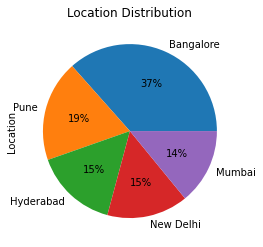

In [0]:
dfp['Location'].value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')
plt.title('Location Distribution')
plt.show()

# Analysis: Most paid salary in India is between 0 to 10 lakhs. Salaries paid between 10 lakhs to 20 lakhs is decreased by 60%

/databricks/python/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6794: RuntimeWarning:

invalid value encountered in multiply



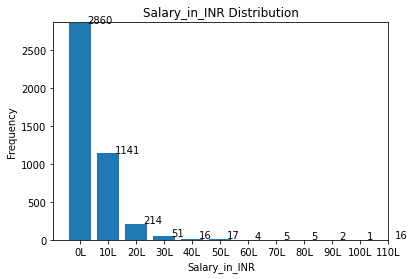

In [0]:
bin_edges = [0, 1000000, 2000000, 3000000 , 4000000, 5000000,6000000,7000000, 8000000 , 9000000, 10000000, 11000000, float('inf')]

salary_bins = pd.cut(dfp['Salary_in_INR'], bins=bin_edges, include_lowest=True, right=False)
salary_counts = salary_bins.value_counts(sort=False)

plt.hist(dfp['Salary_in_INR'], bins=bin_edges, rwidth=0.8, align='left')
plt.xticks(bin_edges[:-1], [f'{int(i/100000):,}L' for i in bin_edges[:-1]])
plt.xlabel('Salary_in_INR')
plt.ylabel('Frequency')
plt.title('Salary_in_INR Distribution')

# set the y-axis limits
plt.ylim(0, salary_counts.max() + 5)

# add text labels to the bars
for i, count in enumerate(salary_counts):
    plt.text(bin_edges[i] + 250000, count + 1, str(count), fontsize=10)

plt.show()

#Analysis: Data Science domain has the most number of data reported in the dataset

/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



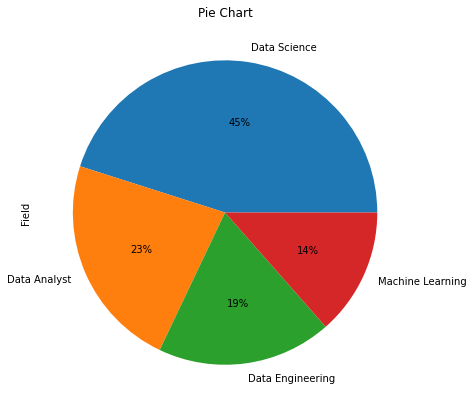

In [0]:
#Finding domain based analysis

data = dfp['Job_Title'].str.contains('Data')
science = dfp['Job_Title'].str.contains('Science')
scientist = dfp['Job_Title'].str.contains('Scientist')
machine = dfp['Job_Title'].str.contains('Machine')
learning = dfp['Job_Title'].str.contains('Learning')
engineer = dfp['Job_Title'].str.contains('Engineer')
engineering = dfp['Job_Title'].str.contains('Engineering')
analyst = dfp['Job_Title'].str.contains('Analyst')

dfp['Field'] = 'Data'

dfp['Field'].loc[data & (science | scientist)] = 'Data Science'
dfp['Field'].loc[machine & learning] = 'Machine Learning'
dfp['Field'].loc[data & analyst] = 'Data Analyst'
dfp['Field'].loc[data & (engineer | engineering)] = 'Data Engineering'

dfp["Field"].value_counts()[:5].plot.pie(figsize = (7, 7), autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

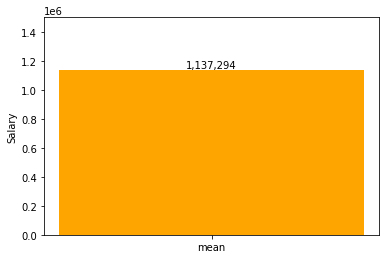

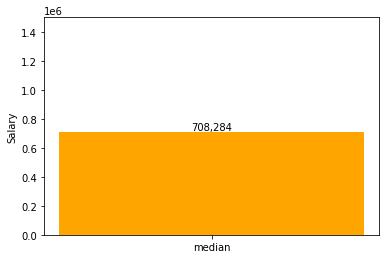

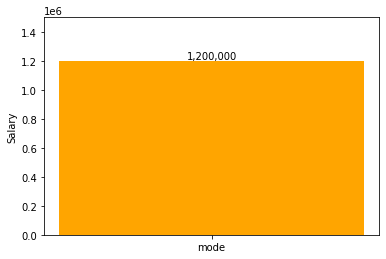

In [0]:

#Finding mean,median and mode of salary 

mean_salary = dfp['Salary_in_INR'].mean()
median_salary = dfp['Salary_in_INR'].median()
mode_salary = statistics.mode(dfp['Salary_in_INR'])

data = [mean_salary, median_salary, mode_salary]

labels = ['Mean Salary', 'Median Salary', 'Mode Salary']
names = ['mean', 'median', 'mode']

for i in range (len(data)):
    plt.bar(names[i], data[i], color='orange')
    plt.ylabel('Salary')
    plt.text(names[i], data[i], f'{data[i]:,.0f}', ha='center', va='bottom')
    plt.ylim(0,1500000)
    plt.yscale('linear')
    plt.show()
    



#Bivariate Analysis

#Analysis: Pune has the highest average salary across all domains

Out[448]: <AxesSubplot:xlabel='Location', ylabel='Salary_in_INR'>

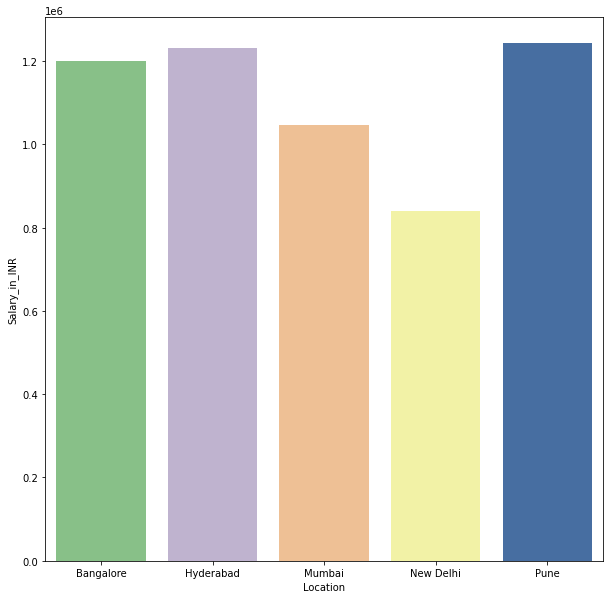

In [0]:
# Average salary in each city

dfp1 = dfp.groupby("Location")["Salary_in_INR"].mean().reset_index()
plt.figure(figsize = (10, 10))
sns.barplot(x = dfp1["Location"], y = dfp1["Salary_in_INR"], palette = "Accent")


#Analysis: Manager is the most paid and Junior is the least paid among all Experience level

/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Out[449]: <AxesSubplot:xlabel='Level', ylabel='Salary_in_INR'>

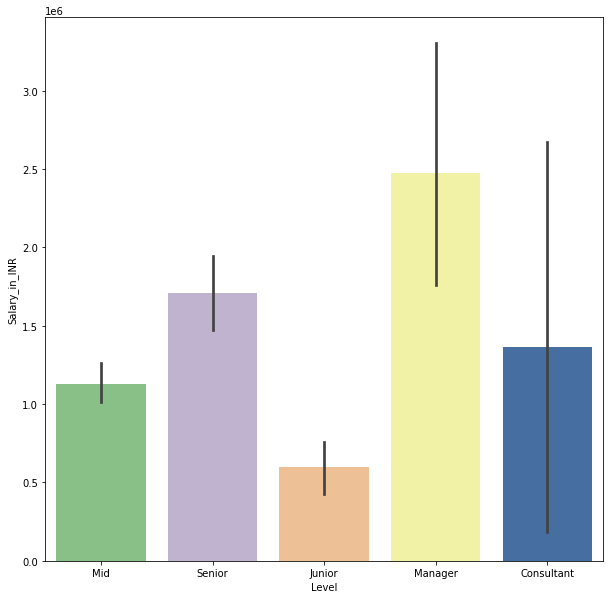

In [0]:
#Experience based analysis
dfp['Level'] = 'Mid'

wJunior =  dfp['Job_Title'].str.contains("Junior")
wTrainee = dfp['Job_Title'].str.contains("Trainee")
wConsultant = dfp['Job_Title'].str.contains("Consultant")
wSenior = dfp['Job_Title'].str.contains("Senior")
wLead = dfp['Job_Title'].str.contains("Lead")
wManager = dfp['Job_Title'].str.contains("Manager")

dfp['Level'].loc[wJunior | wTrainee] = 'Junior'
dfp['Level'].loc[wConsultant] = 'Consultant'
dfp['Level'].loc[wSenior] = 'Senior'
dfp['Level'].loc[wManager| wLead] = 'Manager'

mean_by_level = dfp.groupby(['Level'])["Salary_in_INR"].mean().reset_index()

plt.figure(figsize = (10, 10))
sns.barplot(x = dfp["Level"], y = dfp["Salary_in_INR"], palette = "Accent")

#Avg salary of Top 50 Companies

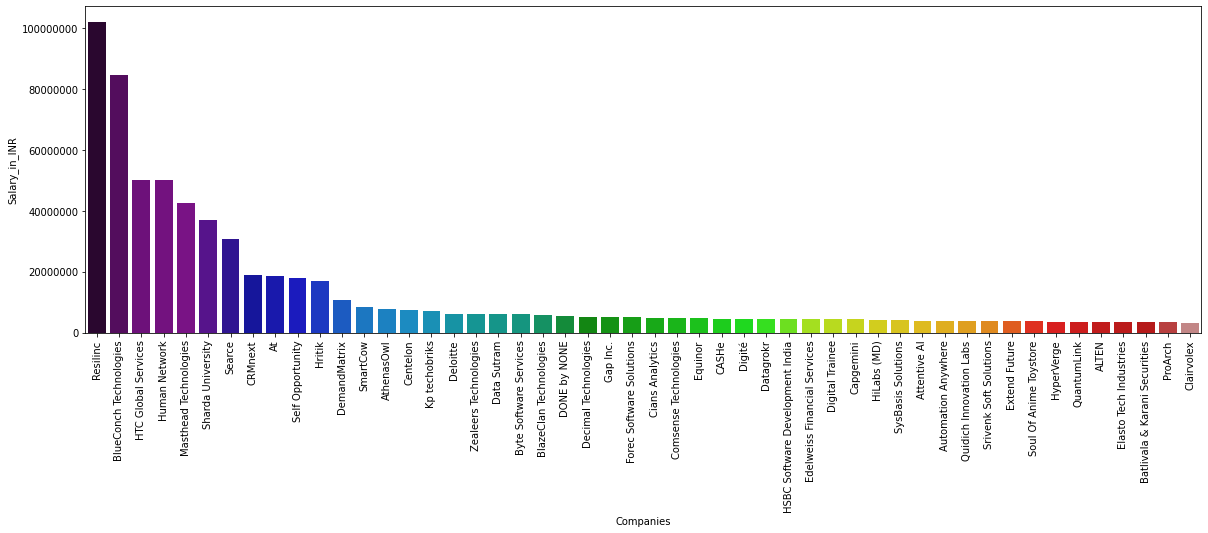

In [0]:
#Top comapnies where average salary is high 
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')

dfp2 = dfp.groupby("Companies")["Salary_in_INR"].mean().reset_index()

dfp2.sort_values("Salary_in_INR", axis = 0, ascending = False, inplace = True)
sns.barplot(x = dfp2["Companies"][:50], y = dfp2["Salary_in_INR"][:50], palette = "nipy_spectral");


#Analysis: Data Science Manager is the most paid

In [0]:
# Average salary per role
grouped_loc = dfp.groupby('Job_Title')[['Salary_in_INR']].agg('mean').reset_index()

fig = px.bar(grouped_loc, x="Job_Title", y="Salary_in_INR", text="Salary_in_INR", title="AVG salary per Job_Title",
             height=500,width=600)
fig.update_traces(textposition="outside", texttemplate='%{text:.3s}')
fig.update_layout(title={'x':0.8, 'xanchor': 'center',})
fig.show()

#Analysis: Most Salaries are Reported from Bangalore location

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/databricks/python/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/databricks/python/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/databricks/python/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/databricks/python/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

81.7% o

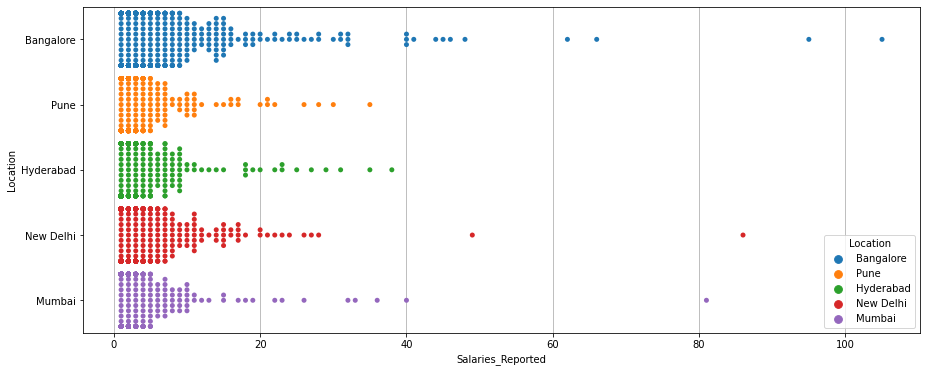

In [0]:
#Salaries Reported by Location
plt.figure(figsize = (15, 6))
plt.grid()
sns.swarmplot(dfp["Salaries_Reported"], dfp["Location"], hue = dfp["Location"]);

#Multivariate Analysis

#Analysis: Data Engineers and Data Analyst are most paid in Hyderabad, Data Scienctist in Mumbai, ML engineers in Bangalore

In [0]:
#Field vs Salary vs Location
px.histogram(dfp,x='Field',y='Salary_in_INR',histfunc='avg',color='Location',barmode='group')

#Analysis: Most Salaries Reported in Bangalore from Data Science domain

In [0]:
#Field vs Salary Reported vs Location

px.histogram(dfp,x='Field',y='Salaries_Reported',histfunc='count',color='Location',barmode='group')

#Analysis: Data Science Manager in Pune is most paid

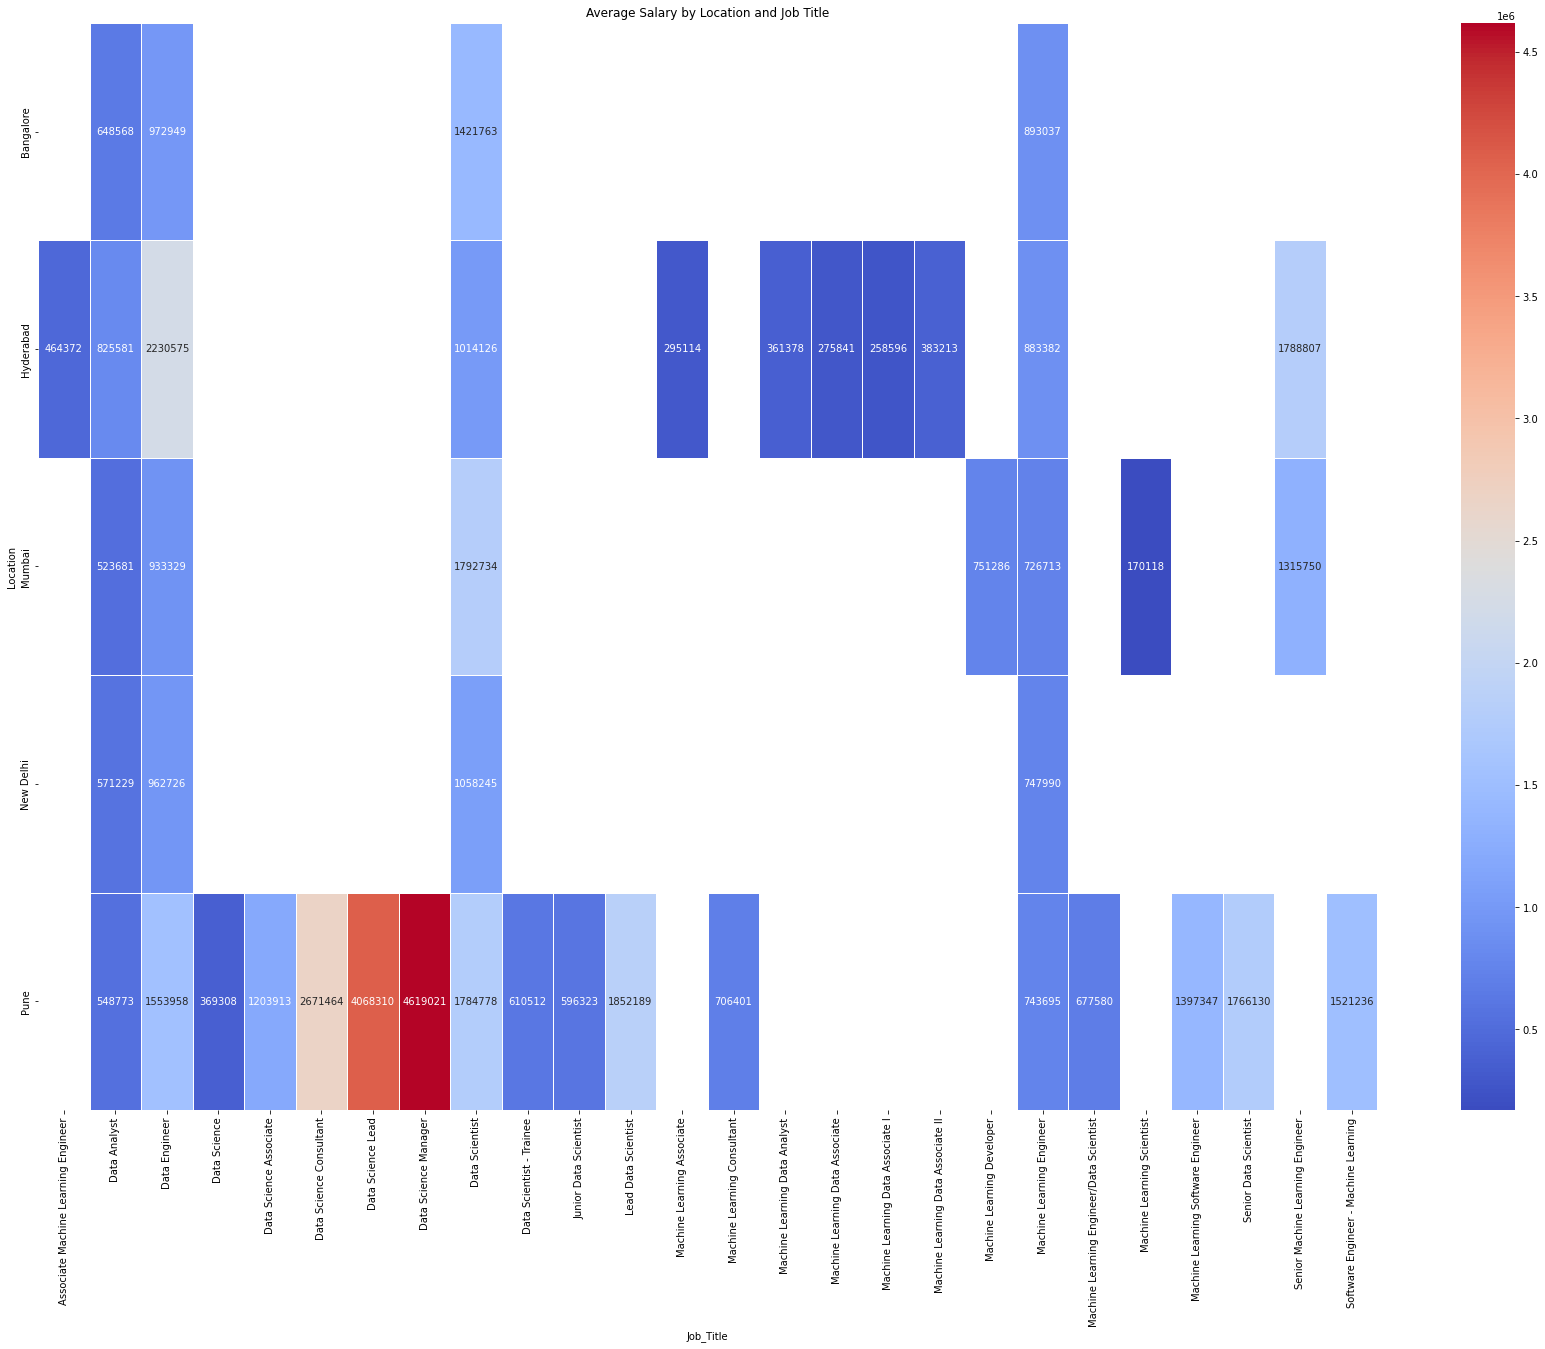

In [0]:
heatmap_data = dfp.pivot_table(index='Location', columns='Job_Title', values='Salary_in_INR', aggfunc='mean')

# create the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Salary by Location and Job Title')
plt.show()

#Analysis: Data Scientist salary of range 0 to 10 lakhs is the most reported

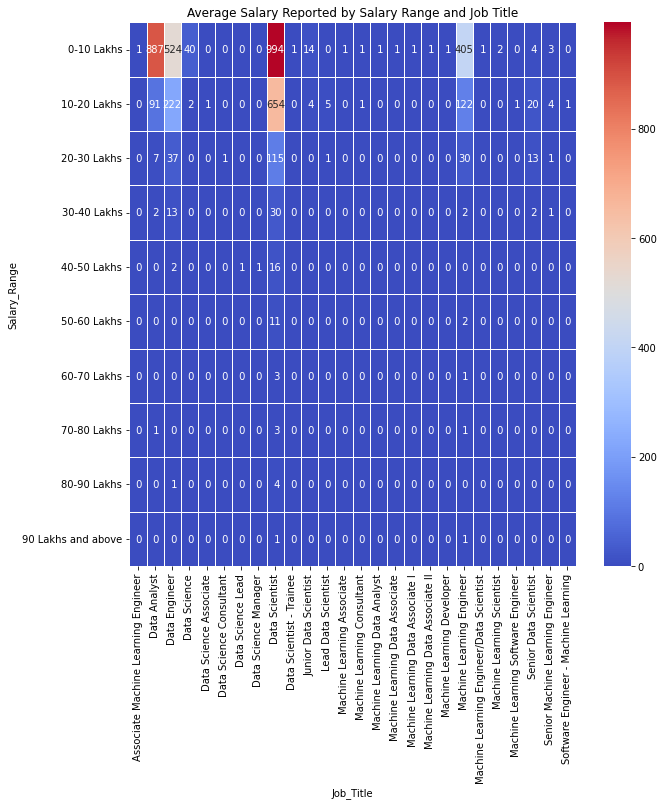

In [0]:
dfp['Salary_Range'] = pd.cut(dfp['Salary_in_INR'], bins=[0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], labels=['0-10 Lakhs', '10-20 Lakhs', '20-30 Lakhs', '30-40 Lakhs', '40-50 Lakhs', '50-60 Lakhs', '60-70 Lakhs', '70-80 Lakhs', '80-90 Lakhs', '90 Lakhs and above'])

# Create the heatmap data
heatmap_data = dfp.pivot_table(index='Salary_Range', columns='Job_Title', values='Salaries_Reported', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt="2.0f", linewidths=0.75)
plt.title('Average Salary Reported by Salary Range and Job Title')
plt.show()